In [71]:
# importing the important liabraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [73]:
# reading the csv file
df = pd.read_csv("Metaphor dataset.csv")
df.head()

,Phrase,Detected_metaphors
0,When on earth they fade and perish.,1
1,A larger rock then heaving from the plain.,1
2,The classroom was a zoo.,1
3,The alligator's teeth are white daggers.,1
4,She is a peacock.,1


In [74]:
# shape of the dataset
df.shape


(517, 2)

In [75]:
# checking is there any null value present
df.isnull().sum()


Phrase                0
Detected_metaphors    0
dtype: int64

In [76]:
# dropping the duplicate values
df = df.drop_duplicates()

In [77]:
# counting the value of each class
df["Detected_metaphors"].value_counts()


1    335
0    166
Name: Detected_metaphors, dtype: int64

In [78]:
import numpy as np
print("sample per class : {}".format(np.bincount(df.Detected_metaphors)))

sample per class : [166 335]


Text(0.5, 1.0, 'metaphor/non metaphor ratio')

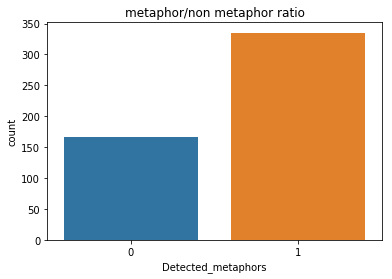

In [79]:
# visualising the class disrtbuttion
import seaborn as sns
sns.countplot(x=df["Detected_metaphors"]).set_title("metaphor/non metaphor ratio")

In [80]:
# function use in the text cleaning
def text_cleaning(a):
    remove_punctuation = [char for char in a if char not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation)
    return [word for word in remove_punctuation.split() if word.lower() not in  stopwords.words("english") ]
    

In [81]:
import string
x_train = df.iloc[: , 0].apply(text_cleaning)
print(x_train)

0                                  [earth, fade, perish]
1                         [larger, rock, heaving, plain]
2                                       [classroom, zoo]
3                    [alligators, teeth, white, daggers]
4                                              [peacock]
5                                      [teacher, dragon]
6                               [Marys, eyes, fireflies]
7                    [computers, school, old, dinosaurs]
8                                           [night, owl]
9                                       [Maria, chicken]
10                                 [wind, howling, wolf]
11             [ballerina, swan, gliding, across, stage]
12                                  [Jamal, pig, dinner]
13                          [kids, monkeys, jungle, gym]
14                                      [dad, road, hog]
15                         [stormy, ocean, raging, bull]
16                               [thunder, mighty, lion]
17                 [Johns, sugg

In [82]:
# importing count vectorizer to convert text data into numerical data
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df["Phrase"])

In [83]:
print(bow_transformer)

CountVectorizer(analyzer=<function text_cleaning at 0x0000022E79F206A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)


In [84]:
title_bow = bow_transformer.transform(df["Phrase"])
print(title_bow)

  (0, 445)	1
  (0, 483)	1
  (0, 785)	1
  (1, 598)	1
  (1, 658)	1
  (1, 797)	1
  (1, 852)	1
  (2, 334)	1
  (2, 1139)	1
  (3, 201)	1
  (3, 382)	1
  (3, 1009)	1
  (3, 1100)	1
  (4, 779)	1
  (5, 427)	1
  (5, 1005)	1
  (6, 106)	1
  (6, 480)	1
  (6, 510)	1
  (7, 355)	1
  (7, 415)	1
  (7, 758)	1
  (7, 877)	1
  (8, 745)	1
  (8, 767)	1
  :	:
  (490, 318)	1
  (490, 422)	1
  (491, 135)	1
  (491, 464)	1
  (492, 132)	1
  (492, 137)	1
  (493, 161)	1
  (493, 896)	1
  (493, 1107)	1
  (494, 41)	1
  (494, 51)	1
  (494, 163)	1
  (495, 165)	1
  (495, 1017)	1
  (496, 33)	1
  (496, 169)	1
  (496, 1069)	1
  (497, 173)	1
  (497, 799)	1
  (498, 176)	1
  (498, 423)	1
  (499, 180)	1
  (499, 644)	1
  (500, 183)	1
  (500, 433)	1


In [85]:
# importing TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(title_bow)

title_tfidf = tfidf_transformer.transform(title_bow)
print(title_tfidf) 
print(title_tfidf.shape)

  (0, 785)	0.6020189188852012
  (0, 483)	0.5646119115393746
  (0, 445)	0.5646119115393746
  (1, 852)	0.4837193388201771
  (1, 797)	0.4837193388201771
  (1, 658)	0.515767002871811
  (1, 598)	0.515767002871811
  (2, 1139)	0.7294046904858382
  (2, 334)	0.6840824493416409
  (3, 1100)	0.4518817799344113
  (3, 1009)	0.5256994146465892
  (3, 382)	0.493034590920125
  (3, 201)	0.5256994146465892
  (4, 779)	1.0
  (5, 1005)	0.7071067811865476
  (5, 427)	0.7071067811865476
  (6, 510)	0.5795835758260646
  (6, 480)	0.5312066591032819
  (6, 106)	0.6179824948629224
  (7, 877)	0.5171650424616799
  (7, 758)	0.44454578680584345
  (7, 415)	0.5171650424616799
  (7, 355)	0.5171650424616799
  (8, 767)	0.7482069815567388
  (8, 745)	0.6634653817266983
  :	:
  (490, 318)	0.5646119115393747
  (490, 131)	0.6020189188852013
  (491, 464)	0.7071067811865476
  (491, 135)	0.7071067811865476
  (492, 137)	0.7071067811865476
  (492, 132)	0.7071067811865476
  (493, 1107)	0.5545452229997944
  (493, 896)	0.6204507968374419


In [86]:
# seperating dependent and the independent features
x = title_tfidf
y = df.Detected_metaphors

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# spliting the dataset into testing and the trainig data
x_train , x_test,y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("size of x_train :", x_train.shape)
print("size of x_test :" ,x_test.shape)
print("size of y_train :", y_train.shape)
print("size of y_test :", y_test.shape)

size of x_train : (400, 1143)
size of x_test : (101, 1143)
size of y_train : (400,)
size of y_test : (101,)


In [89]:
# Multinoomial naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train ,y_train )

In [90]:
all_prediction = model.predict(x_test)
print(all_prediction)
all_prediction.shape

[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]


(101,)

In [91]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,all_prediction)

array([[11, 25],
       [ 2, 63]], dtype=int64)

In [92]:
model.score(x_test , y_test)

0.7326732673267327

In [93]:
# accuracy of multinomial naive bayes classifier
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test, all_prediction))

accuracy: 0.7326732673267327


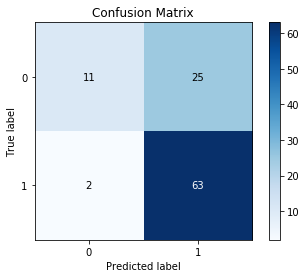

In [94]:
# confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,all_prediction)

In [95]:
testing = " this is a good thing"
print(model.predict(bow_transformer.transform([testing]))[0])

0


In [96]:
testing = "man is a lion"
print(model.predict(bow_transformer.transform([testing]))[0])

1


In [97]:
# training and testing score of Multinomial naive bayes classifier
model.fit(x_train , y_train)
print("training set score:{}".format(model.score(x_train,y_train)))
print("testing set score:{}".format(model.score(x_test,y_test)))

training set score:0.9375
testing set score:0.7326732673267327


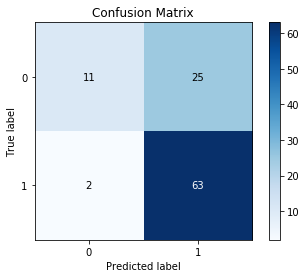

In [98]:
all_prediction = model.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,all_prediction)

In [99]:
# RandomForestClassifier
# training and testing score of RandomForestClassifier classifier
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier(n_estimators=100)
rn.fit(x_train , y_train)
print("training set score:{}".format(rn.score(x_train,y_train)))
print("testing set score:{}".format(rn.score(x_test,y_test)))

training set score:1.0
testing set score:0.5247524752475248


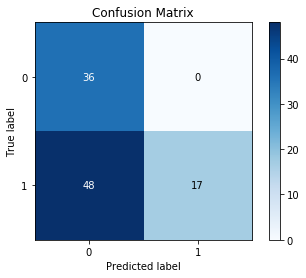

In [100]:
all_prediction = rn.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,all_prediction)

In [101]:
# importing LogisticRegressor
# training and testing score of LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
print("training set score:{}".format(lr.score(x_train,y_train)))
print("testing set score:{}".format(lr.score(x_test,y_test)))

training set score:0.7675
testing set score:0.693069306930693


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


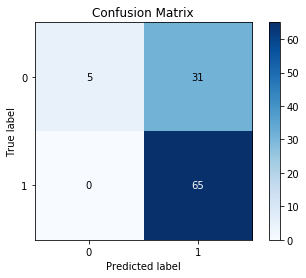

In [102]:
all_prediction = lr.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,all_prediction)

In [103]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)
print("training set score:{}".format(classifier.score(x_train,y_train)))
print("testing set score:{}".format(classifier.score(x_test,y_test)))

training set score:0.9775
testing set score:0.7524752475247525


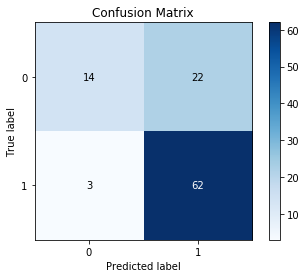

In [104]:
all_prediction = classifier.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test,all_prediction)

In [105]:
# testing sample
testing = "man is a lion"
print(model.predict(bow_transformer.transform([testing]))[0])
print(rn.predict(bow_transformer.transform([testing]))[0])
print(lr.predict(bow_transformer.transform([testing]))[0])
print(classifier.predict(bow_transformer.transform([testing]))[0])

1
0
1
1
